In [3]:
import pandas as pd
df = pd.read_csv('sample_data/Loan_default.csv');
df.head();

In [5]:
df.shape

(255347, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [8]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

LoanID: ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']


In [9]:
df.drop(columns=['LoanID'], inplace=True)


In [10]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [11]:
df = pd.get_dummies(df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Default'])  # All features except target
y = df['Default']  # Target variable

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (204277, 24), Testing Set: (51070, 24)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate model
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8848

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.56      0.04      0.07      5931

    accuracy                           0.88     51070
   macro avg       0.73      0.52      0.50     51070
weighted avg       0.85      0.88      0.84     51070



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate model
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8849

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.63      0.02      0.04      5931

    accuracy                           0.88     51070
   macro avg       0.76      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070



In [15]:
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

Logistic Regression Accuracy: 0.8848
Decision Tree Accuracy: 0.8849


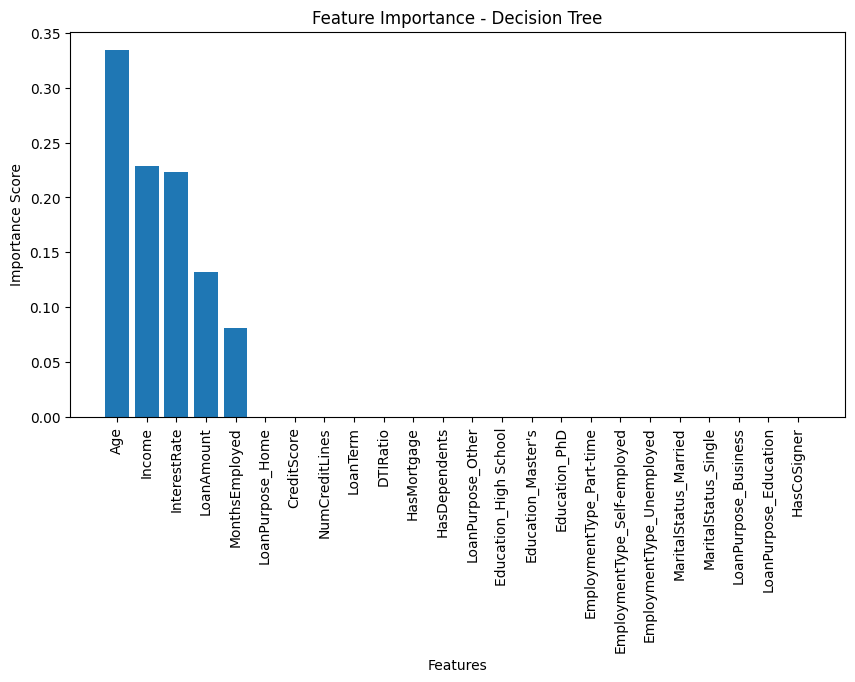

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = tree_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
